In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [154]:
pd.set_option('display.max_rows', 10)

In [155]:
df = pd.read_csv('US_Accidents_June20.csv', parse_dates = True)
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [156]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Minute'] = df['Hour']*60 + df['Start_Time'].dt.minute
df["YMD"] = df["Start_Time"].dt.date
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Minute,YMD
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,Night,Night,Night,2016,2,8,5,0,346,2016-02-08
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,Night,Night,Day,2016,2,8,6,0,367,2016-02-08
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,Night,Day,Day,2016,2,8,6,0,409,2016-02-08
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,Day,Day,Day,2016,2,8,7,0,443,2016-02-08
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,Day,Day,Day,2016,2,8,7,0,459,2016-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,Day,Day,Day,2019,8,23,18,4,1083,2019-08-23
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,Day,Day,Day,2019,8,23,19,4,1151,2019-08-23
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,Day,Day,Day,2019,8,23,19,4,1140,2019-08-23
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,Day,Day,Day,2019,8,23,19,4,1140,2019-08-23


In [157]:
df = df.drop(['Country', 'Turning_Loop', 'ID', 'Source', 'TMC', 'Start_Time', 'Distance(mi)', 'Description', 
         'End_Time', 'End_Lat', 'End_Lng', 'Number', 'Street', 'Side', 'City', 'County', 'Zipcode', 
              'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)'], axis = 1)

In [158]:
df = df.dropna()

In [159]:
df.isna().sum()

Severity     0
Start_Lat    0
Start_Lng    0
State        0
Timezone     0
            ..
Day          0
Hour         0
Weekday      0
Minute       0
YMD          0
Length: 36, dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433944 entries, 5 to 3513616
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Severity               1433944 non-null  int64  
 1   Start_Lat              1433944 non-null  float64
 2   Start_Lng              1433944 non-null  float64
 3   State                  1433944 non-null  object 
 4   Timezone               1433944 non-null  object 
 5   Temperature(F)         1433944 non-null  float64
 6   Humidity(%)            1433944 non-null  float64
 7   Pressure(in)           1433944 non-null  float64
 8   Visibility(mi)         1433944 non-null  float64
 9   Wind_Direction         1433944 non-null  object 
 10  Wind_Speed(mph)        1433944 non-null  float64
 11  Precipitation(in)      1433944 non-null  float64
 12  Weather_Condition      1433944 non-null  object 
 13  Amenity                1433944 non-null  bool   
 14  Bump              

In [161]:
MA_df = df[df['State'] == 'MA']

In [343]:
MA_df['Weather_Condition'].max()

47

In [169]:
#Label Encoder

#one hot encoding
# df = pd.get_dummies(df, columns = categorical, drop_first = True)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


categorical = [col for col in MA_df.columns if MA_df[col].dtype=='O']
# bools = [col for col in df.columns if df[col].dtype =='bool']

MA_df[categorical] = MA_df[categorical].apply(le.fit_transform)
MA_df = MA_df.replace([True, False], [1, 0])


In [ ]:
#DataFrame for daily accidents

In [179]:
MA_YMD = MA_df.groupby('YMD')
MA_YMD

In [ ]:
weather = [['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                        'Wind_Speed(mph)','Precipitation(in)', 'Weather_Condition']]

In [220]:
daily_accident_count = MA_YMD['Severity'].count()
daily_severity_sum = MA_YMD['Severity'].sum()
daily_temp_mean = MA_YMD['Temperature(F)'].mean()
daily_hmd_mean = MA_YMD['Humidity(%)'].mean()
daily_prs_mean = MA_YMD['Pressure(in)'].mean()
daily_vis_mean = MA_YMD['Visibility(mi)'].mean()
daily_wind_mean = MA_YMD['Wind_Speed(mph)'].mean()
daily_pre_mean = MA_YMD['Precipitation(in)'].mean()
daily_weather_mean = MA_YMD['Weather_Condition'].sum()  #mean ?

In [221]:
MA_YMD_df = pd.DataFrame({
    'Severity':daily_severity_sum,
    'Number':daily_accident_count,  
    'Temperature':daily_temp_mean, 
    'Humidity':daily_hmd_mean, 
    'Pressure':daily_prs_mean, 
    'Visibility':daily_vis_mean, 
    'Wind_Speed':daily_wind_mean, 
    'Precipitation':daily_pre_mean, 
    'Weather_Condition':daily_weather_mean
})

In [222]:
MA_YMD_df

,Severity,Number,Temperature,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Weather_Condition
YMD,,,,,,,,,
0,9,4,42.475000,90.750000,29.670000,5.500000,9.800000,0.055000,95
1,11,5,23.540000,86.000000,30.006000,1.280000,6.480000,0.022000,183
2,9,4,54.850000,83.750000,29.762500,3.625000,14.975000,0.050000,110
3,2,1,52.000000,54.000000,30.200000,10.000000,21.900000,0.000000,31
4,6,3,56.366667,77.333333,29.946667,10.000000,13.433333,0.013333,68
...,...,...,...,...,...,...,...,...,...
839,108,44,78.818182,51.295455,29.662045,10.000000,8.909091,0.000000,492
840,33,12,75.666667,65.500000,29.711667,9.666667,4.083333,0.001667,92
841,61,24,70.833333,81.166667,29.642917,5.447917,8.541667,0.162083,513


In [223]:
#Feature Scaling 
#MinMaxScaler or StandardScaler

#MinMaxScaler (0 to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
MA_YMD_df_scaled = scaler.fit(MA_YMD_df).transform(MA_YMD_df)
MA_YMD_df_scaled = pd.DataFrame(MA_YMD_df_scaled, index = MA_YMD_df.index,  columns = MA_YMD_df.columns)

In [224]:
#All dataframes so far

df #clean data no null
MA_df #label endoded dataset for MA
MA_YMD_df  #DataFrame for daily accidents / not scaled

MA_YMD_df_scaled #Scaled MA_YMD_df dataset


,Severity,Number,Temperature,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Weather_Condition
YMD,,,,,,,,,
0,0.023411,0.026786,0.443012,0.881410,0.579592,0.526980,0.315113,0.113905,0.031767
1,0.030100,0.035714,0.221096,0.820513,0.716735,0.083392,0.208360,0.045562,0.061507
2,0.023411,0.026786,0.588046,0.791667,0.617347,0.329888,0.481511,0.103550,0.036837
3,0.000000,0.000000,0.554644,0.410256,0.795918,1.000000,0.704180,0.000000,0.010139
4,0.013378,0.017857,0.605821,0.709402,0.692517,1.000000,0.431940,0.027613,0.022643
...,...,...,...,...,...,...,...,...,...
839,0.354515,0.383929,0.868950,0.375583,0.576345,1.000000,0.286466,0.000000,0.165934
840,0.103679,0.098214,0.832015,0.557692,0.596599,0.964961,0.131297,0.003452,0.030754
841,0.197324,0.205357,0.775369,0.758547,0.568537,0.521505,0.274652,0.335676,0.173031


In [259]:
#Principal Component Analysis   #Unscaled MA_df
from sklearn.decomposition import PCA

X = MA_YMD_df.iloc[:, 1:9]
y = MA_YMD_df.iloc[:, 0]

pca = PCA(n_components = 2)
X_pca = pca.fit(X).transform(X)
X_pca.shape

(844, 2)

In [227]:
X_pca[0:2]

array([[-202.80531761,  -23.80821096],
       [-114.8386348 ,  -23.38272968]])

In [228]:
pca.inverse_transform(X_pca)

array([[2.61634265e+00, 4.88510240e+01, 9.15843204e+01, ...,
        8.61500473e+00, 2.44843738e-02, 9.50834433e+01],
       [6.95402666e+00, 4.86068982e+01, 9.21301415e+01, ...,
        8.71422726e+00, 2.54014789e-02, 1.82941876e+02],
       [5.97982241e+00, 5.03773987e+01, 8.37211199e+01, ...,
        8.82521498e+00, 1.97432134e-02, 1.09903572e+02],
       ...,
       [2.83220933e+01, 5.07193221e+01, 7.88078759e+01, ...,
        9.46052066e+00, 1.93843472e-02, 5.12747267e+02],
       [3.36801891e+01, 4.99123558e+01, 8.19231586e+01, ...,
        9.54382462e+00, 2.21233595e-02, 6.36977007e+02],
       [1.01838764e+01, 5.12521382e+01, 7.88825005e+01, ...,
        9.00770925e+00, 1.71002859e-02, 1.60525782e+02]])

In [229]:
pca.explained_variance_ratio_

array([0.99264351, 0.00338278])

In [230]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99264351, 0.9960263 ])

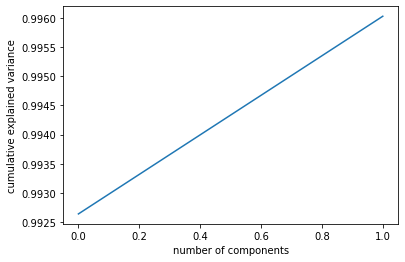

In [231]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [232]:
#n_components = 3

In [233]:
pca = PCA(n_components = 3)
X_pca = pca.fit(X).transform(X)
X_pca.shape

(844, 3)

In [234]:
X_pca[0:2]

array([[-202.80531761,  -23.80821096,    6.51057464],
       [-114.8386348 ,  -23.38272968,   25.69571832]])

In [235]:
pca.inverse_transform(X_pca)

array([[2.80919666e+00, 4.24622862e+01, 9.03796461e+01, ...,
        8.86123010e+00, 2.23974027e-02, 9.50630812e+01],
       [7.71517644e+00, 2.33920415e+01, 8.73755732e+01, ...,
        9.68602131e+00, 1.71646910e-02, 1.82861512e+02],
       [5.85701262e+00, 5.44457586e+01, 8.44882587e+01, ...,
        8.66841821e+00, 2.10722005e-02, 1.09916539e+02],
       ...,
       [2.77206196e+01, 7.06445388e+01, 8.25650181e+01, ...,
        8.69259216e+00, 2.58931996e-02, 5.12810772e+02],
       [3.30828445e+01, 6.97007839e+01, 8.56545077e+01, ...,
        8.78116803e+00, 2.85875280e-02, 6.37040076e+02],
       [9.67493567e+00, 6.81119826e+01, 8.20616294e+01, ...,
        8.35792183e+00, 2.26077914e-02, 1.60579517e+02]])

In [236]:
pca.explained_variance_ratio_

array([0.99264351, 0.00338278, 0.00292741])

In [237]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99264351, 0.9960263 , 0.9989537 ])

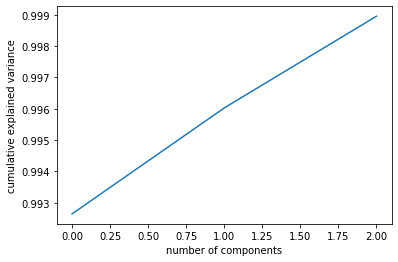

In [238]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [239]:
#Principal Component Analysis   #Scaled df

X_scaled = MA_YMD_df_scaled.iloc[:, 1:9]
y_scaled = MA_YMD_df_scaled.iloc[:, 0]

pca = PCA(n_components = 2)
X_pca_scaled = pca.fit(X_scaled).transform(X_scaled)
X_pca_scaled.shape

(844, 2)

In [240]:
X_pca_scaled[0:2]

array([[ 0.36264587, -0.02188597],
       [ 0.7212763 ,  0.23267715]])

In [241]:
pca.inverse_transform(X_pca_scaled)

array([[0.16654704, 0.5125907 , 0.84556141, ..., 0.29560298, 0.05561177,
        0.1329166 ],
       [0.21824793, 0.23440421, 0.93067553, ..., 0.34799737, 0.0639962 ,
        0.18951999],
       [0.16329168, 0.5168096 , 0.9003626 , ..., 0.29069066, 0.06301339,
        0.13869904],
       ...,
       [0.12781961, 0.69833757, 0.88420581, ..., 0.25361003, 0.06282835,
        0.10642575],
       [0.11900088, 0.76713168, 0.77312419, ..., 0.24726253, 0.04867049,
        0.08176876],
       [0.11891834, 0.76817521, 0.7702764 , ..., 0.24725161, 0.04829966,
        0.08125707]])

In [242]:
pca.explained_variance_ratio_

array([0.46472462, 0.17169936])

In [243]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46472462, 0.63642398])

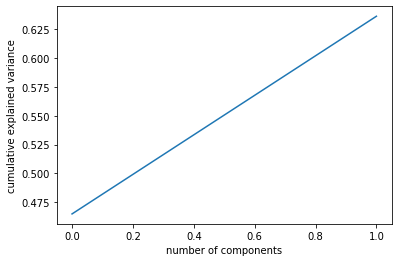

In [244]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [246]:
#n_components = 5
pca = PCA(n_components = 5)
X_pca_scaled = pca.fit(X_scaled).transform(X_scaled)
X_pca_scaled.shape

pca.explained_variance_ratio_

array([0.46472462, 0.17169936, 0.13979884, 0.0933312 , 0.0705992 ])

In [247]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46472462, 0.63642398, 0.77622282, 0.86955402, 0.94015322])

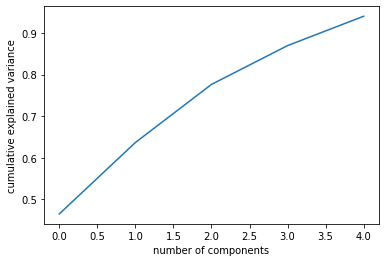

In [248]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [249]:
#Feature extraction #Scaled
from sklearn.feature_selection import SelectKBest, f_regression, chi2

#chi2
#Chi-squared stats of non-negative features for classification tasks.

#Unknown label type: (array([0.66666667, 0.66666667, 0.66666667, ..., 0.33333333, 0.33333333,
#       0.33333333]),)

#f_regression
#F-value between label/feature for regression tasks.

selector = SelectKBest(f_regression, k=5)
selector.fit(X_scaled, y_scaled)

X_scaled_n = selector.transform(X_scaled)



In [250]:
X_scaled_n

array([[0.02678571, 0.88141026, 0.57959184, 0.52697968, 0.03176749],
       [0.03571429, 0.82051282, 0.71673469, 0.08339173, 0.06150727],
       [0.02678571, 0.79166667, 0.61734694, 0.32988788, 0.03683677],
       ...,
       [0.20535714, 0.75854701, 0.56853741, 0.52150491, 0.17303143],
       [0.29464286, 0.82013575, 0.56746699, 0.82996001, 0.21493748],
       [0.17857143, 0.81684982, 0.61263362, 0.8135449 , 0.05373437]])

In [251]:
X_scaled.columns[selector.get_support()]

Index(['Number', 'Humidity', 'Pressure', 'Visibility', 'Weather_Condition'], dtype='object')

In [252]:
#Feature extraction #Unscaled

selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)

X_n = selector.transform(X)

In [260]:
X.columns[selector.get_support()]

Index(['Number', 'Weather_Condition'], dtype='object')

In [255]:
#Logistic Regression

In [256]:
#Classification

In [295]:
#Clustering

X = MA_YMD_df_scaled[['Number', 'Humidity', 'Pressure', 'Visibility', 'Weather_Condition']]

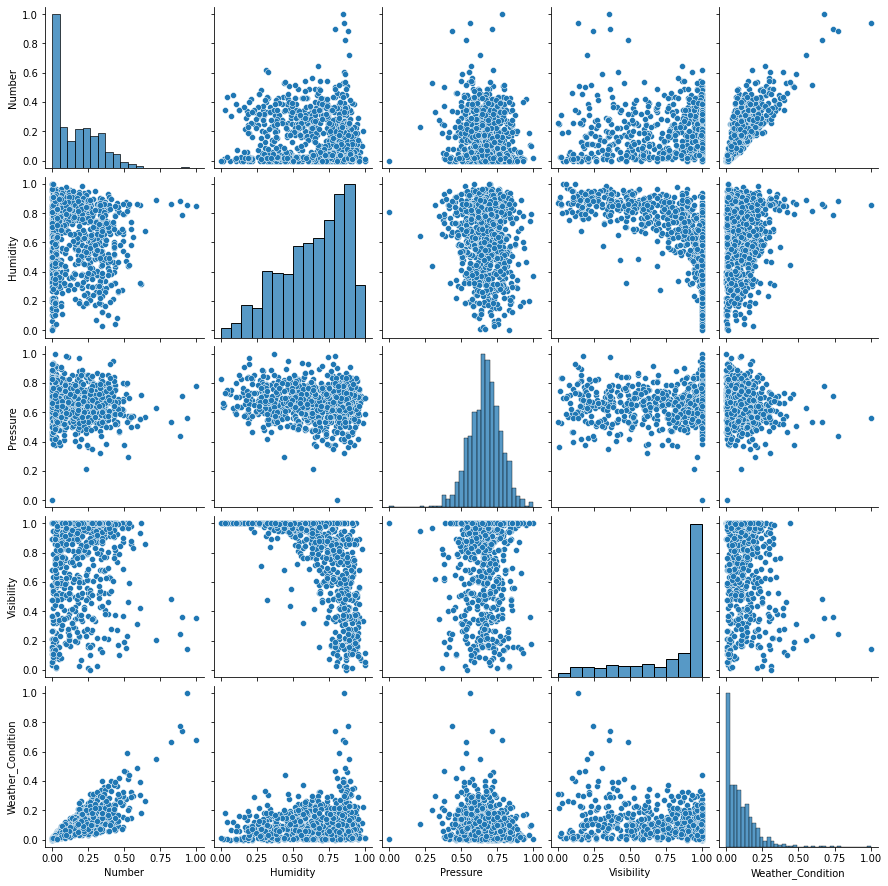

In [257]:
sns.pairplot(X)

In [296]:
#Train test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 0)


In [ ]:
#Clustering

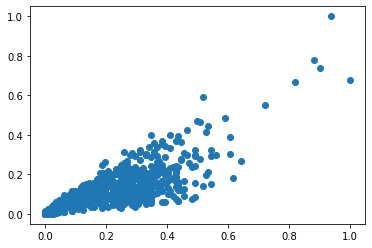

In [318]:
plt.scatter(X_scaled['Number'], X_scaled['Weather_Condition'])

In [333]:
#KMeans clustering

X_cluster= X_scaled[['Number', 'Weather_Condition']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_cluster)

KMeans(n_clusters=2, random_state=0)

In [334]:
kmeans.labels_[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [335]:
centers = kmeans.cluster_centers_
centers

array([[0.05020044, 0.04212675],
       [0.3269774 , 0.18063153]])

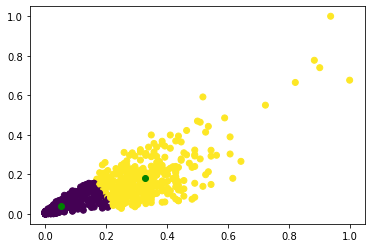

In [336]:
plt.scatter(X_cluster['Number'], X_cluster['Weather_Condition'], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c = 'green')

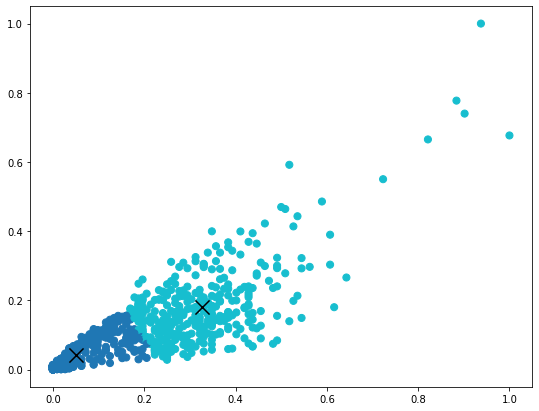

In [337]:
y_kmeans = kmeans.predict(X_cluster)

fig, ax = plt.subplots(figsize=(9,7))

ax.scatter(X_cluster['Number'], X_cluster['Weather_Condition'], c=y_kmeans, s=50, cmap='tab10')
ax.scatter(centers[:, 0], centers[:, 1], c='k',marker='x', s=200)

In [ ]:
#KMeans clustering

In [323]:
X_cluster= X_scaled[['Humidity', 'Pressure']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_cluster)

KMeans(n_clusters=2, random_state=0)

In [324]:
kmeans.labels_[0:50]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0], dtype=int32)

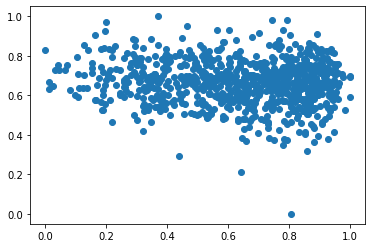

In [325]:
plt.scatter(X_scaled['Humidity'], X_scaled['Pressure'])

In [326]:
centers = kmeans.cluster_centers_
centers

array([[0.79079814, 0.64967398],
       [0.38884807, 0.68346654]])

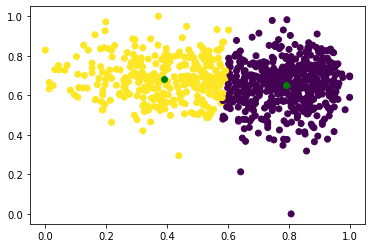

In [327]:
plt.scatter(X_cluster['Humidity'], X_cluster['Pressure'], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c = 'green')

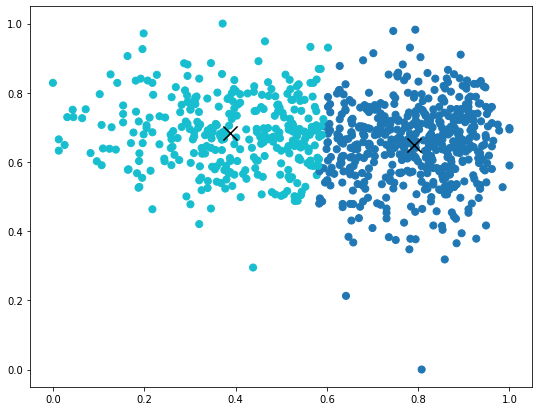

In [328]:
fig, ax = plt.subplots(figsize=(9,7))

ax.scatter(X_cluster['Humidity'], X_cluster['Pressure'], c=kmeans.labels_, s=50, cmap='tab10')
ax.scatter(centers[:, 0], centers[:, 1], c='black', 
           marker='x', s=200)


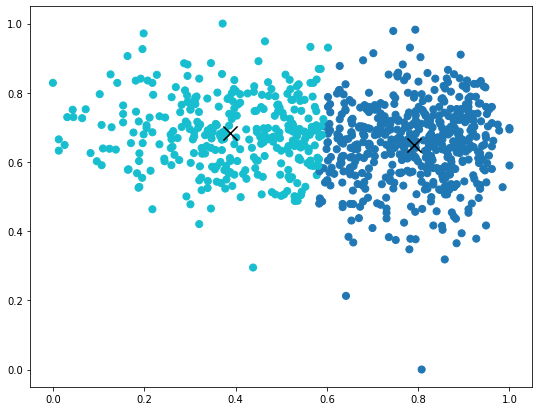

In [332]:
y_kmeans = kmeans.predict(X_cluster)

fig, ax = plt.subplots(figsize=(9,7))

ax.scatter(X_cluster['Humidity'], X_cluster['Pressure'], c=y_kmeans, s=50, cmap='tab10')
ax.scatter(centers[:, 0], centers[:, 1], c='k',marker='x', s=200)


In [ ]:
#with kmeans we were able to seperate the data into two clusters

In [345]:
#Elbow method

n_clusters = np.arange(1, 10)

models = [KMeans(n, random_state = 0).fit(X_scaled) for n in n_clusters]

metrics = [model.inertia_ for model in models]
metrics

[212.30847546904235,
 136.0228829491636,
 114.3056364228302,
 101.44773597830002,
 93.33408448008548,
 85.97005670156044,
 80.05934076980468,
 75.39444815826482,
 71.27180619655043]

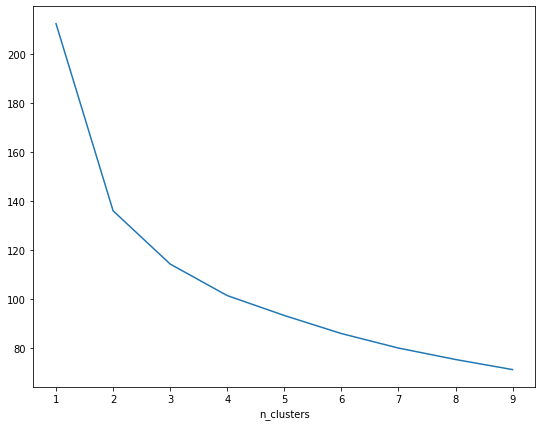

In [346]:
fig, ax = plt.subplots(figsize = (9,7))
ax.plot(n_clusters, metrics, label='Inertia')
plt.xlabel('n_clusters');

In [347]:
# number of clusters will 3

In [348]:
#KMeans clustering

X_cluster= X_scaled[['Number', 'Weather_Condition']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_cluster)

KMeans(n_clusters=3, random_state=0)

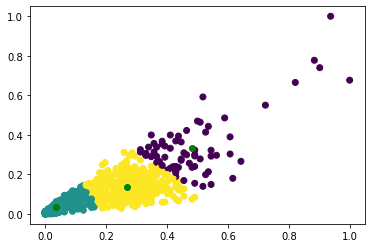

In [349]:
centers = kmeans.cluster_centers_
centers
plt.scatter(X_cluster['Number'], X_cluster['Weather_Condition'], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c = 'green')

In [350]:
#KMeans clustering

X_cluster= X_scaled[['Number', 'Humidity']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_cluster)

KMeans(n_clusters=3, random_state=0)

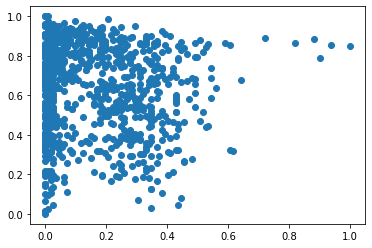

In [353]:
plt.scatter(X_scaled['Number'], X_scaled['Humidity'])

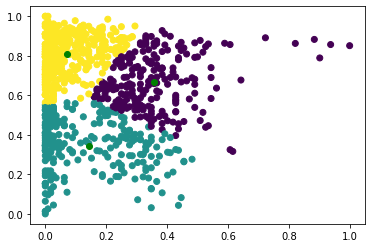

In [352]:
centers = kmeans.cluster_centers_
centers
plt.scatter(X_cluster['Number'], X_cluster['Humidity'], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c = 'green')